In [1]:
import ROOT

In [2]:
file1 = ROOT.TFile("hlla_Z_propagator_run_01.root")

file2 = ROOT.TFile("hlla_Za_propagator_run_01.root")

In [3]:
tree1 = file1.Get('events')
tree2 = file2.Get('events')

In [4]:
branches1 = tree1.GetListOfBranches()

for branch in branches1:
    print(branch.GetName())

numParticles
eventweight
scale
alpha_qed
alpha_qcd
pid
status
mother1
mother2
color1
color2
px
py
pz
energy
mass
tau
spin


In [34]:
# From the data we conclude 
# Particle ID Higgs : 25
# Particle ID Z boson : 23
# Particle ID \gamma : 22
# Particle ID Mu+ : -13
# Particle ID Mu- : 13
# Particle ID e+ : -11
# Particle ID e- : 11

Tree 1 : Only Z Propagator

In [44]:
import ROOT
import csv

# Open a CSV file for writing
with open("OUTPUT_Z_Propagator_DATA_particle_momentum_data.csv", mode="w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write the header row
    csvwriter.writerow(["Event", "Particle", "Px", "Py", "Pz", "Energy"])

    # Initialize event counter
    event_counter = 0

    # Loop over all events in the tree
    for event in tree1:
        # Access branches for all particles in the event
        x = event.px
        y = event.py
        z = event.pz
        e = event.energy  # Energy
        pid = event.pid  # Particle IDs

        # Initialize momentum vectors
        fourvectorHiggs = None
        fourvectorZ = None
        fourvectorGamma = None
        fourvectorMuPlus = None
        fourvectorMuMinus = None
        fourvectorEPlus = None
        fourvectorEMinus = None

        # Loop over all particles in the event
        for j in range(len(pid)):
            # Higgs momentum vector
            if pid[j] == 25:
                fourvectorHiggs = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Higgs", x[j], y[j], z[j], e[j]])

            # Z boson momentum vector
            elif pid[j] == 23:
                fourvectorZ = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Z Boson", x[j], y[j], z[j], e[j]])

            # Photon momentum vector
            elif pid[j] == 22:
                fourvectorGamma = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Photon", x[j], y[j], z[j], e[j]])

            # Muon momentum vectors
            elif pid[j] == -13:
                fourvectorMuPlus = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Muon+", x[j], y[j], z[j], e[j]])
            elif pid[j] == 13:
                fourvectorMuMinus = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Muon-", x[j], y[j], z[j], e[j]])

            # Electron momentum vectors
            elif pid[j] == -11:
                fourvectorEPlus = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Electron+", x[j], y[j], z[j], e[j]])
            elif pid[j] == 11:
                fourvectorEMinus = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Electron-", x[j], y[j], z[j], e[j]])

        # Increment event counter
        event_counter += 1

print("Particle momentum data saved to 'OUTPUT_Z_Propagator_DATA_particle_momentum_data.csv'.")


Particle momentum data saved to 'OUTPUT_Z_Propagator_DATA_particle_momentum_data.csv'.


Analysing the Angles between $Z, \ell^+$ and $Z, \ell^-$

In [45]:

import csv
import math

# Function to calculate angle between two momentum vectors
def calculate_angle(px1, py1, pz1, px2, py2, pz2):
    # Calculate dot product and magnitudes
    dot_product = px1 * px2 + py1 * py2 + pz1 * pz2
    mag1 = math.sqrt(px1**2 + py1**2 + pz1**2)
    mag2 = math.sqrt(px2**2 + py2**2 + pz2**2)
    
    # Avoid division by zero
    if mag1 == 0 or mag2 == 0:
        return None
    
    # Calculate angle in radians and convert to degrees
    cos_theta = dot_product / (mag1 * mag2)
    angle_rad = math.acos(max(min(cos_theta, 1), -1))  # Clamp value to [-1, 1]
    angle_deg = math.degrees(angle_rad)
    return angle_deg

# Read data from the original CSV file
input_csv = "OUTPUT_Z_Propagator_DATA_particle_momentum_data.csv"
output_csv = "OUTPUT_Z_Propagator_DATA_z_lepton_angles.csv"

# Open the output CSV file
with open(output_csv, mode="w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(["Event", "Angle_Z_l+", "Angle_Z_l-"])
    
    # Read the input CSV file
    with open(input_csv, mode="r") as infile:
        csvreader = csv.reader(infile)
        header = next(csvreader)  # Skip header row
        
        # Initialize variables
        current_event = None
        z_vector = None
        lepton_plus_vector = None
        lepton_minus_vector = None
        angles = []

        # Loop over rows in the input CSV
        for row in csvreader:
            event = int(row[0])
            particle = row[1]
            px, py, pz = map(float, row[2:5])
            
            # Check if we're moving to a new event
            if current_event is not None and event != current_event:
                # Calculate angles for the previous event
                angle_z_lepton_plus = None
                angle_z_lepton_minus = None
                
                if z_vector and lepton_plus_vector:
                    angle_z_lepton_plus = calculate_angle(
                        z_vector[0], z_vector[1], z_vector[2],
                        lepton_plus_vector[0], lepton_plus_vector[1], lepton_plus_vector[2]
                    )
                
                if z_vector and lepton_minus_vector:
                    angle_z_lepton_minus = calculate_angle(
                        z_vector[0], z_vector[1], z_vector[2],
                        lepton_minus_vector[0], lepton_minus_vector[1], lepton_minus_vector[2]
                    )
                
                # Write results to the output CSV
                csvwriter.writerow([current_event, angle_z_lepton_plus, angle_z_lepton_minus])
                
                # Reset vectors for the new event
                z_vector = None
                lepton_plus_vector = None
                lepton_minus_vector = None
            
            # Update the current event
            current_event = event
            
            # Assign momentum vectors based on particle type
            if particle == "Z Boson":
                z_vector = (px, py, pz)
            elif particle == "Muon+" or particle == "Electron+":
                lepton_plus_vector = (px, py, pz)
            elif particle == "Muon-" or particle == "Electron-":
                lepton_minus_vector = (px, py, pz)
        
        # Handle the last event
        if current_event is not None:
            angle_z_lepton_plus = None
            angle_z_lepton_minus = None
            
            if z_vector and lepton_plus_vector:
                angle_z_lepton_plus = calculate_angle(
                    z_vector[0], z_vector[1], z_vector[2],
                    lepton_plus_vector[0], lepton_plus_vector[1], lepton_plus_vector[2]
                )
            
            if z_vector and lepton_minus_vector:
                angle_z_lepton_minus = calculate_angle(
                    z_vector[0], z_vector[1], z_vector[2],
                    lepton_minus_vector[0], lepton_minus_vector[1], lepton_minus_vector[2]
                )
            
            csvwriter.writerow([current_event, angle_z_lepton_plus, angle_z_lepton_minus])

print(f"Angles between Z and leptons saved to '{output_csv}'.")


Angles between Z and leptons saved to 'OUTPUT_Z_Propagator_DATA_z_lepton_angles.csv'.


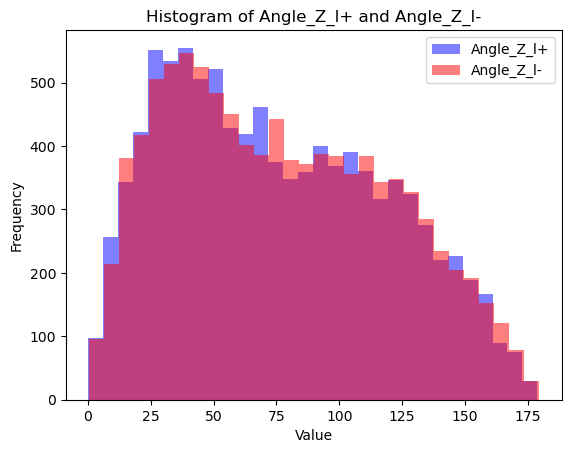

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('OUTPUT_Z_Propagator_DATA_z_lepton_angles.csv')

# Extract the column names
col_2_name = data.columns[1]  # Name of the 2nd column
col_3_name = data.columns[2]  # Name of the 3rd column

# Extract the 2nd and 3rd columns (data)
col_2 = data.iloc[:, 1]  # 2nd column (index 1)
col_3 = data.iloc[:, 2]  # 3rd column (index 2)

# Create the histograms
plt.hist(col_2, bins=30, alpha=0.5, label=col_2_name, color='blue')
plt.hist(col_3, bins=30, alpha=0.5, label=col_3_name, color='red')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of ' + col_2_name + ' and ' + col_3_name)
plt.legend()

# Show the plot
plt.show()


Tree 2 : Z and $\gamma$ Propagator

In [46]:
import ROOT
import csv

# Open a CSV file for writing
with open("OUTPUT_Za_Propagator_DATA_particle_momentum_data.csv", mode="w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write the header row
    csvwriter.writerow(["Event", "Particle", "Px", "Py", "Pz", "Energy"])

    # Initialize event counter
    event_counter = 0

    # Loop over all events in the tree
    for event in tree2:
        # Access branches for all particles in the event
        x = event.px
        y = event.py
        z = event.pz
        e = event.energy  # Energy
        pid = event.pid  # Particle IDs

        # Initialize momentum vectors
        fourvectorHiggs = None
        fourvectorZ = None
        fourvectorGamma = None
        fourvectorMuPlus = None
        fourvectorMuMinus = None
        fourvectorEPlus = None
        fourvectorEMinus = None

        # Loop over all particles in the event
        for j in range(len(pid)):
            # Higgs momentum vector
            if pid[j] == 25:
                fourvectorHiggs = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Higgs", x[j], y[j], z[j], e[j]])

            # Z boson momentum vector
            elif pid[j] == 23:
                fourvectorZ = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Z Boson", x[j], y[j], z[j], e[j]])

            # Photon momentum vector
            elif pid[j] == 22:
                fourvectorGamma = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Photon", x[j], y[j], z[j], e[j]])

            # Muon momentum vectors
            elif pid[j] == -13:
                fourvectorMuPlus = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Muon+", x[j], y[j], z[j], e[j]])
            elif pid[j] == 13:
                fourvectorMuMinus = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Muon-", x[j], y[j], z[j], e[j]])

            # Electron momentum vectors
            elif pid[j] == -11:
                fourvectorEPlus = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Electron+", x[j], y[j], z[j], e[j]])
            elif pid[j] == 11:
                fourvectorEMinus = ROOT.Math.PxPyPzEVector(x[j], y[j], z[j], e[j])
                csvwriter.writerow([event_counter, "Electron-", x[j], y[j], z[j], e[j]])

        # Increment event counter
        event_counter += 1

print("Particle momentum data saved to 'OUTPUT_Za_Propagator_DATA_particle_momentum_data.csv'.")



Particle momentum data saved to 'OUTPUT_Za_Propagator_DATA_particle_momentum_data.csv'.


Azimuthal angle distribution

$$\phi$$